In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [25]:
df = pd.read_csv('../data/cleaned.csv')


In [26]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [27]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  ...  letter1_int  letter

In [31]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



ModuleNotFoundError: No module named 'prophet'

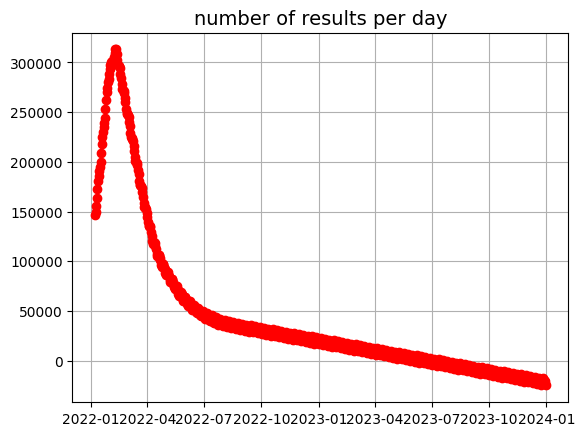

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,13254.302233,-43241.096279,78320.888813,-44165.774841,73650.06984,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,16468.671929


In [ ]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


21:41:16 - cmdstanpy - INFO - Chain [1] start processing
21:41:16 - cmdstanpy - INFO - Chain [1] done processing


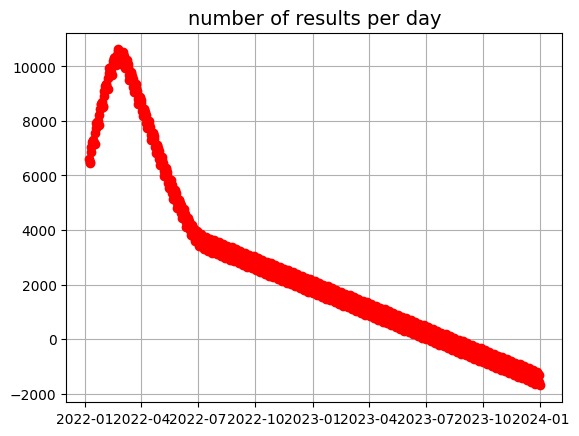

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1428.631998,-261.775888,3584.453553,486.270647,2453.945777,175.957446,175.957446,175.957446,175.957446,175.957446,175.957446,0.0,0.0,0.0,1604.589444


In [ ]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


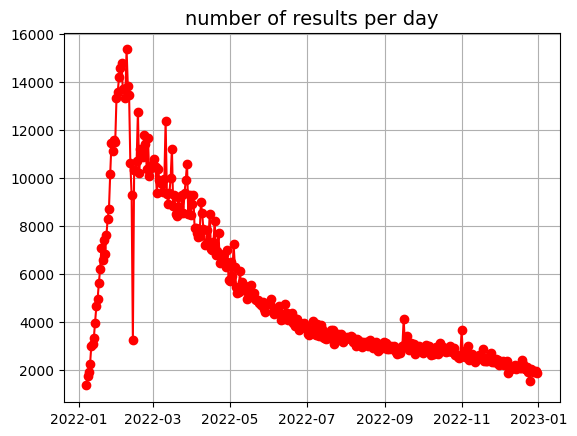

In [ ]:
plt.plot(df['date'], df['num_hardmode'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/gm/phwm98352tj19cnh_y_nt3n80000gn/T/ipykernel_35702/3992753031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


Cluster 0
Mean word score results: 1.6004868111038286
Mean average number of guesses: 3.761578947368421
Mean word occuraence: 0.027392642570865364


Cluster 1
Mean word score results: 1.3261015574798813
Mean average number of guesses: 4.72875
Mean word occuraence: 0.005450028919988113


Cluster 2
Mean word score results: 1.348062712279306
Mean average number of guesses: 4.156647727272727
Mean word occuraence: 0.012115481664328675




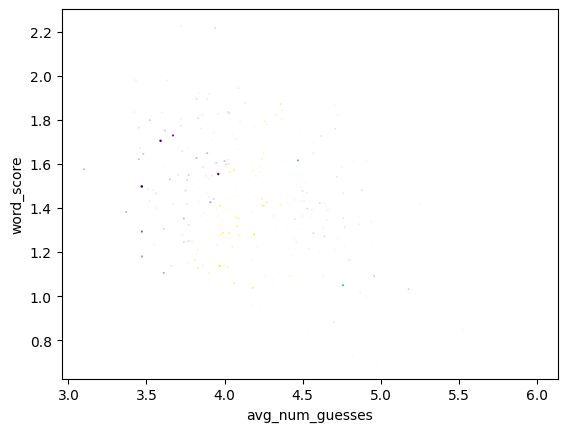

In [34]:
from sklearn.cluster import KMeans
import matplotlib.dates as dates
df_kmeans = df[["word_score", "avg_num_guesses", "word_occurrence"]]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occuraence:', 
          cluster_data['word_occurrence'].mean())
    print('\n')

plt.scatter(df_kmeans['avg_num_guesses'],
            df_kmeans['word_score'], 
            df_kmeans['word_occurrence'],
            c=df_kmeans['cluster'])
plt.xlabel('avg_num_guesses')
plt.ylabel('word_score')
plt.show()


In [35]:
from scipy import stats
import numpy as np

# assuming your data is stored in a numpy array called "data"
# and the columns are ordered 1, 2, 3, ..., 7+

# calculate the Shapiro-Wilk test statistic and p-value
x = df[['in1','in2','in3','in4','in5','in6','over6']]

x = x.values.flatten()
result = stats.kstest(x, dist='gumbel')
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


TypeError: kstest() got an unexpected keyword argument 'dist'

In [36]:
from fitter import Fitter, get_common_distributions, get_distributions
cols = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']
in1 = [1 for _ in range(sum([length for length in df.in1.to_numpy()]))]
in2 = [2 for _ in range(sum([length for length in df.in2.to_numpy()]))]
in3 = [3 for _ in range(sum([length for length in df.in3.to_numpy()]))]
in4 = [4 for _ in range(sum([length for length in df.in4.to_numpy()]))]
in5 = [5 for _ in range(sum([length for length in df.in5.to_numpy()]))]
in6 = [6 for _ in range(sum([length for length in df.in6.to_numpy()]))]
over6 = [7 for _ in range(sum([length for length in df.over6.to_numpy()]))]

total_guesses = in1 + in2 + in3 + in4 + in5 + in6 + over6
result = stats.kstest(total_guesses, stats.norm.cdf)

plt.hist(total_guesses, bins = 7)
f = Fitter(total_guesses, distributions=get_distributions())
f.fit()
f.summary()


ModuleNotFoundError: No module named 'fitter'

In [37]:
print(len(total_guesses))


2513


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


KeyboardInterrupt: 

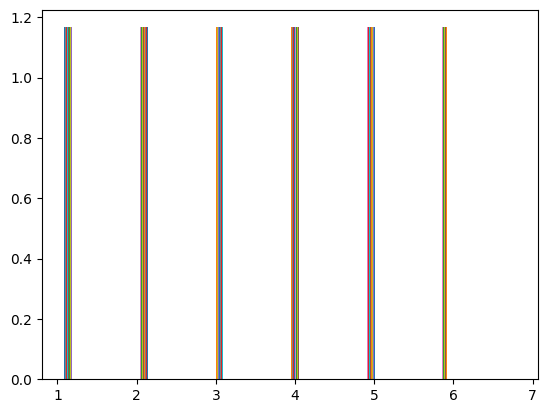

In [38]:
n, bins, patches = plt.hist(total_guesses, bins=7, density=True, alpha=0.5)

# Overlay a normal distribution on top of the histogram
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(bins), max(bins), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, '--')

# Add labels and a title to the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution Overlay')

# Display the plot
plt.show()


In [ ]:
# Create histogram
plt.hist(total_guesses, bins=7, density=True)

# Add normal distribution curve
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(total_guesses), max(total_guesses), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='red')

# Set labels and title
plt.xlabel('Total Guesses')
plt.ylabel('Frequency')
plt.title('Histogram of Total Guesses with Normal Distribution')

# Show plot
plt.show()


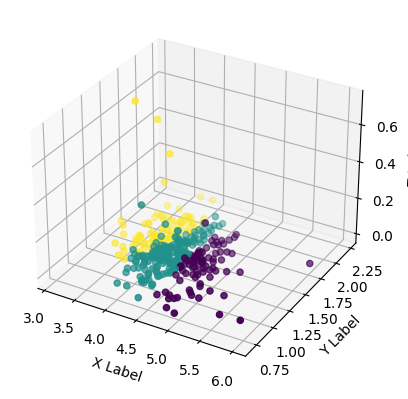

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(df_kmeans['avg_num_guesses'],
           df_kmeans['word_score'],
           df_kmeans['word_occurrence'],
           c=df_kmeans['cluster'])

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


In [51]:
df_kmeans[df_kmeans.cluster == 1].avg_num_guesses

4      4.45
5      5.18
9      4.51
26     4.80
30     4.55
       ... 
343    4.46
347    4.87
352    4.56
353    4.57
356    4.64
Name: avg_num_guesses, Length: 88, dtype: float64

In [62]:
boxplot_df

[7      3.72
 8      4.13
 10     3.75
 11     3.47
 12     3.43
        ... 
 340    4.00
 346    3.47
 348    3.93
 349    3.82
 350    3.77
 Name: avg_num_guesses, Length: 95, dtype: float64,
 4      4.45
 5      5.18
 9      4.51
 26     4.80
 30     4.55
        ... 
 343    4.46
 347    4.87
 352    4.56
 353    4.57
 356    4.64
 Name: avg_num_guesses, Length: 88, dtype: float64,
 0      4.34
 1      4.14
 2      4.40
 3      4.15
 6      4.18
        ... 
 351    4.37
 354    3.77
 355    4.43
 357    4.22
 358    4.13
 Name: avg_num_guesses, Length: 176, dtype: float64]

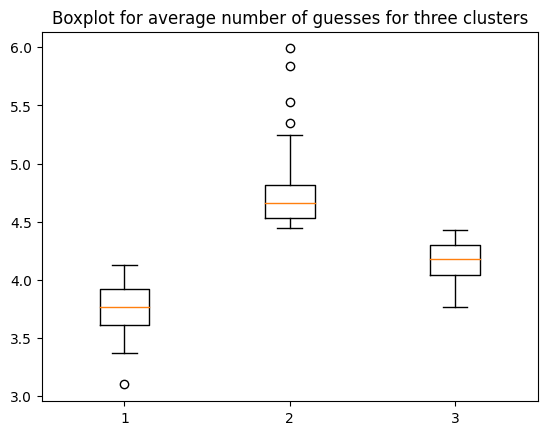

In [59]:
boxplot_df = [df_kmeans[df_kmeans.cluster == 0].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 1].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 2].avg_num_guesses]

plt.boxplot(boxplot_df)
plt.title('Boxplot for average number of guesses for three clusters')
plt.show()

In [40]:
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(endog=df_stacked_bar, order=(1, 1, 1))
# model_fit = model.fit()
# print(model_fit.summary())


ModuleNotFoundError: No module named 'statsmodels'

In [42]:
df


,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,word_score,word_occurrence,vowels,repeats,percent_hard
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,...,1,14,12,25,4.34,1.292494,0.001632,1,0,0.093180
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,15,12,1,18,4.14,1.564995,0.001400,2,0,0.093048
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,1,22,15,3,4.40,1.169976,0.000796,2,0,0.095945
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,13,16,5,12,4.15,1.377718,0.000204,2,0,0.096081
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,15,14,4,15,4.45,1.271154,0.000276,2,1,0.096365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,18,9,14,11,3.77,1.148502,0.014598,1,0,0.019606
355,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,21,5,18,25,4.43,1.187546,0.003178,2,0,0.020927
356,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,15,18,7,5,4.64,1.421003,0.001064,2,1,0.020912
357,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,18,1,14,11,4.22,1.300505,0.001037,1,0,0.017369


In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

df = pd.concat((df, df_kmeans["cluster"]), axis=1)

print(df)
# Create a new column indicating the number of unique letters in each solution word
df["unique_letters"] = df["word"].apply(
    lambda x: len(set(x)))

# Split the data into training and testing sets
X = df[["unique_letters"]]
y = df["cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
# print("Confusion matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Classification report:")
# print(classification_report(y_test, y_pred))

# Use the model to classify the word "EERIE"
word = "EERIE"
unique_letters = len(set(word))
difficulty = clf.predict([[unique_letters]])[0]

# Print the predicted difficulty of the word "EERIE"
print(f"The predicted difficulty of the word '{word}' is {difficulty}.")


          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  ...  letter3_int  letter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
df.columns

Index(['date', 'contest_num', 'word', 'num_results', 'num_hardmode', 'in1',
       'in2', 'in3', 'in4', 'in5', 'in6', 'over6', 'day_of_week', 'letter1',
       'letter2', 'letter3', 'letter4', 'letter5', 'letter1_int',
       'letter2_int', 'letter3_int', 'letter4_int', 'letter5_int',
       'avg_num_guesses', 'word_score', 'word_occurrence', 'vowels', 'repeats',
       'percent_hard', 'cluster', 'unique_letters'],
      dtype='object')

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X = df[['letter1_int','letter2_int','letter3_int','letter4_int','letter5_int','word_score','word_occurrence','vowels','repeats']]
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with default parameters
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Use the trained model to predict the target variable for the test data
y_pred = clf.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5138888888888888
